In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [14]:
dataset = pd.read_csv("penguins_classification.csv")
print(dataset)

     Culmen Length (mm)  Culmen Depth (mm)    Species
0                  39.1               18.7     Adelie
1                  39.5               17.4     Adelie
2                  40.3               18.0     Adelie
3                  36.7               19.3     Adelie
4                  39.3               20.6     Adelie
..                  ...                ...        ...
337                55.8               19.8  Chinstrap
338                43.5               18.1  Chinstrap
339                49.6               18.2  Chinstrap
340                50.8               19.0  Chinstrap
341                50.2               18.7  Chinstrap

[342 rows x 3 columns]


In [15]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)']
x = dataset[features].values  
y = dataset['Species'].astype('category').cat.codes 

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
ypred = classifier.predict(xtest)

In [19]:
print("Classification Report:")
print(classification_report(ytest, ypred))
print(f"Accuracy Score: {accuracy_score(ytest, ypred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00        23

    accuracy                           0.97        69
   macro avg       0.95      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69

Accuracy Score: 0.97


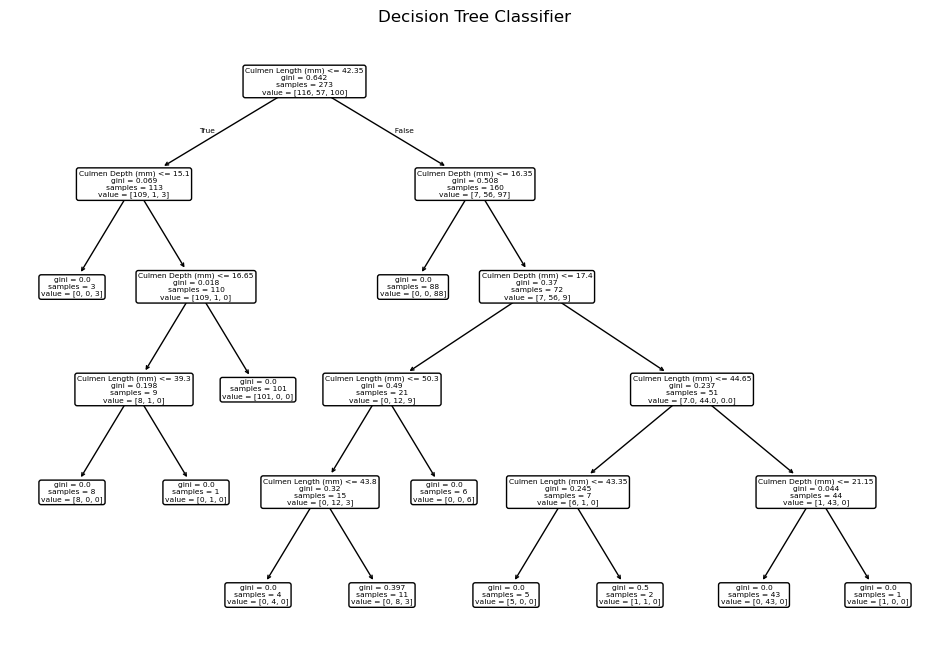

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=False, feature_names=features, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [21]:
from sklearn.tree import export_graphviz

export_graphviz(classifier, out_file="decision_tree.dot", 
                feature_names=features, 
                filled=False, rounded=True, special_characters=True)

print("Decision Tree exported as 'decision_tree.dot'")

Decision Tree exported as 'decision_tree.dot'


In [22]:
sample = np.array([[50.0, 16.5]])
predictions = classifier.predict(sample)
species_mapping = dict(enumerate(dataset['Species'].astype('category').cat.categories))
predicted_species = species_mapping[predictions[0]]
print(f"Sample {sample[0]} => Predicted Species: {predicted_species}")

Sample [50.  16.5] => Predicted Species: Chinstrap
